In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts 'job_skills' column to list type - Allows for .explode()
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)) 

# Filter for 'Data Analyst' jobs and jobs from the USA (also dropping NaN values)
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


<Axes: >

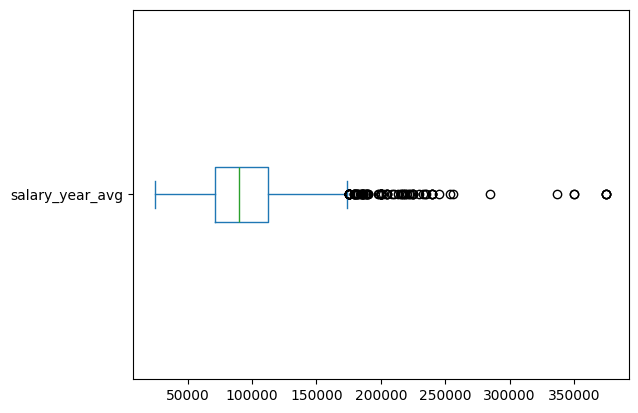

In [2]:
df_DA_US['salary_year_avg'].plot(kind='box', vert = False)

C:\Users\nicks\AppData\Local\Temp\ipykernel_96884\1380861638.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


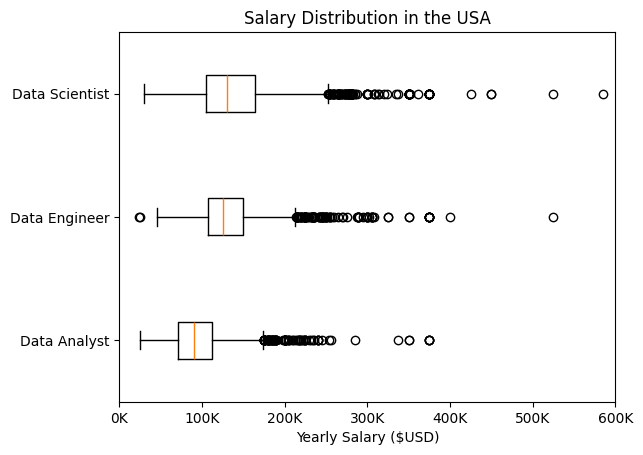

In [12]:
# List of job titles needed for plot
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter data for jobs in job_titles and from the USA + Drop NaN Values
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# Using list comprehension to get a series of the salaries for each of the 3 job titles
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the USA')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [ ]:
df_US